# Assignment 6 - Exercise 3
## Due June 11th at 14:00

Please note: 

- Read the instructions in the exercise PDF and in this notebook carefully.
- Add your solutions *only* at `YOUR CODE HERE`/`YOUR ANSWER HERE` and remove the corresponding `raise NotImplementedError()`.
- Do not chance the provided code and text, if not stated.
- Do not *add* or *delete* cells.
- Do not `import` additional functionality. 
- Before submitting: Please make sure, that your notebook can be executed from top to bottom `Menu -> Kernel -> Restart & Run all`. 

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [3]:
# load the training data
df = pd.read_csv('train.csv')
X_train, y_train = df[['x', 'y']].to_numpy(), df[['label']].to_numpy().flatten()

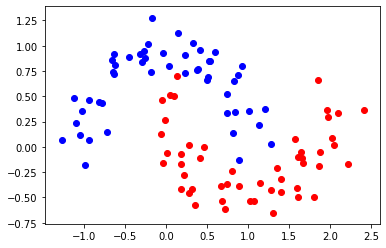

In [12]:
plt.scatter(df['x'][df['label']==1], df['y'][df['label']==1], c='r')
plt.scatter(df['x'][df['label']==0], df['y'][df['label']==0], c='b')
plt.show()

In [ ]:
# Here you can inspect the data. This part will not be graded, but it is something that you should always do!

## a) Achieve zero training error


In [57]:
from itertools import product
grid_C = [10, 20, 30, 40, 50, 51, 52, 55, 60, 70, 80, 90, 100]
grid_G = [2, 2.2, 2.4, 2.6, 2.8, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
# put the values of hyperparameters for which overfitting happens into C and gamma
C = []
gamma = []

params = product(grid_C, grid_G)
# print([c for c in product(grid_C, grid_G)])
for c, g in params:
    svc = SVC(kernel='rbf', C=c, gamma=g).fit(X_train, y_train)
    
    if svc.score(X_train, y_train) == 1:
        C.append(c)
        gamma.append(g)

print(C, gamma)

# we pick one
C, gamma = C[0], gamma[0]

[10, 10, 20, 20, 20, 20, 20, 20, 20, 30, 30, 30, 30, 30, 30, 30, 30, 30, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100] [12, 13, 7, 8, 9, 10, 11, 12, 13, 5, 6, 7, 8, 9, 10, 11, 12, 13, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 2.8, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 2.4, 2.6, 2.8, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 2.2, 2.4, 2.6, 2.8, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 2, 2.2, 2.4, 2.6, 2

In [58]:
overfit = SVC(kernel='rbf', C=C, gamma=gamma).fit(X_train, y_train)
assert overfit.score(X_train, y_train) == 1.

- **Qualitatively, what is the range of hyperparameters for which interpolation happens?:** 
    As we increase the gamma parameter, model is able to overfit for smaller parameter values of C so the hard intervals are dependent on combination of values. This also makes sense as C directly influences amount of regularizations but 'width'(gamma) of RBF kernel does too. 

## b) Assuming that the kernel matrix is of full rank, can kernel SVM achieve zero training error on any dataset? Explain.

Yes. Lets assume you use RBF kernel, you can make the kernel width (standard deviation) small so that it 'lifts' exactly the training points that belong to one class and almost no points in its neighborhood. 

# c) Now use cross-validation to obtain reasonable values for all hyperparameters.

In [75]:
# again, put the values of hyperparameters that you would choose into C and gamma
C = [1e-2, 1e-1, .2, .4, .6, .8, 1, 2, 2.2, 2.4, 2.6, 2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 5, 6, 7, 8]
gamma = [1e-3, 1e-2, 1e-1, 2e-1, 3e-1, 4e-1, 5e-1, 6e-1, 7e-1, 8e-1, 9e-1, 1, 2, 3, 4, 5, 6, 6.2, 6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8]

params = {'C':C, 'gamma': gamma}
svc = SVC(kernel='rbf')

clf = GridSearchCV(svc, params).fit(X_train, y_train)
print(max(clf.cv_results_['mean_test_score']))
C, gamma = clf.best_params_['C'], clf.best_params_['gamma']

/home/bozidar/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.98


/home/bozidar/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [76]:
# after cross-validation, load the test data
df = pd.read_csv('test.csv')
X_test, y_test = df[['x', 'y']].to_numpy(), df[['label']].to_numpy().flatten()

In [77]:
cross_validated = SVC(kernel='rbf', C=C, gamma=gamma).fit(X_train, y_train)
print('train accuracy is ', cross_validated.score(X_train, y_train))
print('test accuracy is ', cross_validated.score(X_test, y_test))
assert cross_validated.score(X_test, y_test) >= 0.95

train accuracy is  0.98
test accuracy is  0.99


# d) Plot the decision boundary of your classifiers together with the datapoints.

In [78]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

## Plot the decision boundary of your overfit classifier

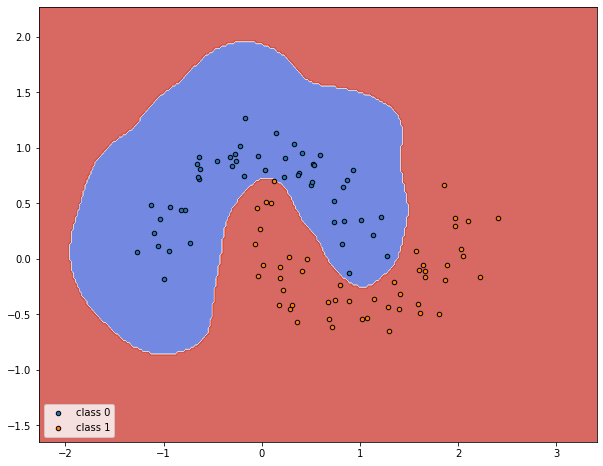

In [79]:
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)
fig, ax = plt.subplots(1, 1, figsize=(10,8))
plot_contours(ax, overfit, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], s=20, cmap=plt.cm.coolwarm, label='class 0', edgecolors='k')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], s=20, cmap=plt.cm.coolwarm, label='class 1', edgecolors='k')
plt.legend(loc="lower left")
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
plt.show()

## Plot the decision boundary of your cross-validated classifier

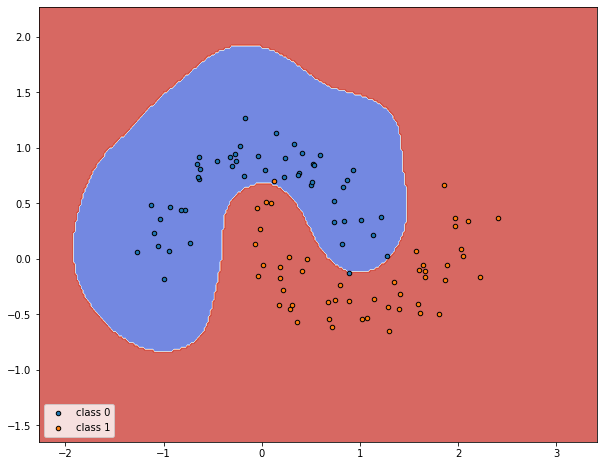

In [80]:
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)
fig, ax = plt.subplots(1, 1, figsize=(10,8))
plot_contours(ax, cross_validated, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], s=20, cmap=plt.cm.coolwarm, label='class 0', edgecolors='k')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], s=20, cmap=plt.cm.coolwarm, label='class 1', edgecolors='k')
plt.legend(loc="lower left")
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
plt.show()

# e) Play around with hyperparametes and kernels

/home/bozidar/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


train accuracy is 0.78
test accuracy is 0.79


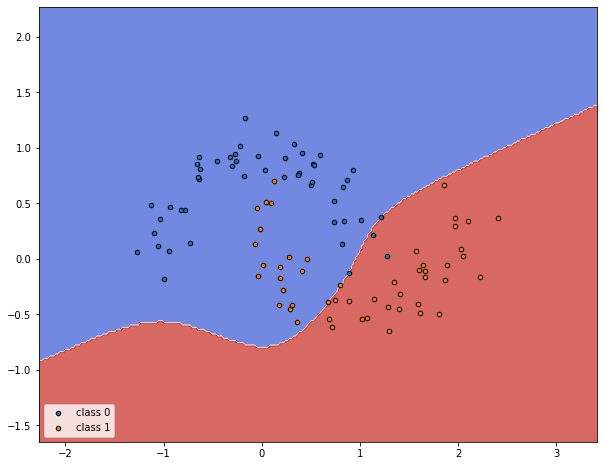

In [81]:
# train a classifier for your choice of kernel and hyperparameters 
clf = SVC(kernel='poly', C=10, degree=5).fit(X_train, y_train)
print('train accuracy is', clf.score(X_train, y_train))
print('test accuracy is', clf.score(X_test, y_test))

# TODO: you might also want to cross-validate your hyperparameters!

# plot the decision boundary
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)
fig, ax = plt.subplots(1, 1, figsize=(10,8))
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], s=20, cmap=plt.cm.coolwarm, label='class 0', edgecolors='k')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], s=20, cmap=plt.cm.coolwarm, label='class 1', edgecolors='k')
plt.legend(loc="lower left")
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
plt.show()